In [6]:
# ms-python.python added
import os
try:
	os.chdir('~/7331-lab-2') 
	print(os.getcwd())
except:
	pass


  # Data Mining 7331 - Summer 2019
  ## Lab 2 - Classification

  ### Carson Drake, Che Cobb, David Josephs, Andy Heroy


 <a id="top"></a>
 ## Table of Contents
 * <a href="#business">Section 1: Business Understanding</a>
   * <a href="#business1">Section 1.1: Data Description</a>
   * <a href="#business2">Section 1.2: Data Potential</a>
 * <a href="#understanding">Section 2: Data Understanding</a>
   * <a href="#understanding1">Section 2.1: Variable Description</a>
   * <a href="#understanding2">Section 2.2: Data Quality</a>
   * <a href="#understanding3">Section 2.3: Simple Statistics</a>
   * <a href="#understanding4">Section 2.4: Interesting Visualizations</a>
 * <a href="#preparation">Section 3: Data Preparation</a>
   * <a href="#preparation1">Section 3.1:Part 1</a>
   * <a href="#preparation2">Section 3.2:Part 2</a>
 * <a href="#modeling">Section 4: Modeling and Evaluation</a>
   * <a href="#modeling1">Section 4.1:Part 1</a>
   * <a href="#modeling2">Section 4.2:Part 2</a>
   * <a href="#modeling3">Section 4.3:Part 3</a>
       * <a href="#modeling3_1">Task 1:Classification 1</a>
           * <a href="#modeling3_1_1">Logistic Regression</a>
           * <a href="#modeling3_1_2">Random Forest</a>
           * <a href="#modeling3_1_3">KNN</a>
       * <a href="#modeling3_2">Task 2:Classification 2</a>
           * <a href="#modeling3_2_1">Logistic Regression</a>
           * <a href="#modeling3_2_2">Random Forest</a>
           * <a href="#modeling3_2_3">Naive Bayes</a>
           * <a href="#modeling3_2_4">Stochastic Gradient Descent:</a>
   * <a href="#modeling4">Section 4.4:Part 4</a>
   * <a href="#modeling5">Section 4.5:Part 5</a>
   * <a href="#modeling6">Section 4.6:Part 6</a>
   * <a href="#deployment">Section 4.7:Deployment</a>
   * <a href="#exceptional">Section 4.8:Exceptional Work</a>


 <a id="business"></a> <a href="#top">Back to Top</a>
  ## Section 1: Business Understanding
 <a id="business1"></a> <a href="#top">Back to Top</a>
  ### Section 1.1: Data Description

  Describe the purpose of the data set you selected.
  We chose this dataset from the UCI's machine learning repository for its categorical
  predictive attributes.  It contains 1994 Census data pulled from the US Census
  database.  The prediction task we've set forth is to predict if a persons
  salary range is greater than 50k, based on the various categorical/numerical
  attributes in the census database. The link to the data source is below:

  https://archive.ics.uci.edu/ml/datasets/census+income

 <a id="business2"></a> <a href="#top">Back to Top</a>
  ### Section 1.2: Data potential

  Describe how you would define and measure the outcomes from the dataset.
  (That is, why is this data important and how do you know if you have mined
  useful knowledge from the dataset? How would you measure the effectiveness of
  a good prediction algorithm? Be specific.)

  The main benefit of this data is to be able to predict a persons salary range
  based on factors collected around each worker in 1994.  With that insight, we
  can look at a persons, age, education, marital status, occupation and begin to
  explore the relationships that most influence income.  We'd like to find:
    * What factors are the strongest influence of a how much many they will
      make.
    * What age groups show the largest amount of incomes over >50k?  aka, what
      years of our life should we be working hardest in order to make the most
      money.
    * Does where you come from influence your income? (native country)

 <a id="understanding"></a> <a href="#top">Back to Top</a>
  ## Section 2: Data Understanding
 <a id="understanding1"></a> <a href="#top">Back to Top</a>
  ### Section 2.1: Variable Description

  Describe the meaning and type of data for each attribute
  Here we will discuss each attribute and give some description about its ranges.


  Categorical - Description
  #### Categorical Attributes
  * workclass - Which business sector do they work in?
  * education - What level of education received?
  * marital_status - What is their marriage history
  * occupation - What do they do for a living
  * relationship - Family member relation
  * race - What is the subjects race
  * gender - What is the subjects gender
  * native_country - Where is the subject originally from
  * income_bracket - Do they make over or under 50k/year

  #### Continuous Attributes
  * age - How old is the subject?
  * fnlwgt - Sampling weight of observation
  * education_num - numerical encoding of education variable
  * capital_gain - income from investment sources, separate from wages/salary
  * capital_loss - losses from investment sources, separate from wages/salary
  * hours_per_week - How many hours a week did they work?


 <a id="understanding2"></a> <a href="#top">Back to Top</a>
  ### Section 2.2: Data Quality
  Verify data quality: Explain any missing values, duplicate data, and outliers.
  Are those mistakes? How do we deal with these problems?

  In the next code section we will import our libraries and data, then begin looking at
  missing data, duplicate data, and outliers.

In [7]:
# Add library references
import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.plotly as py
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
import timeit
get_ipython().run_line_magic('matplotlib', 'inline')




In [8]:
df_headers = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income_bracket'
]
df_census = pd.read_csv("data/adult-training.csv",
    names=df_headers, 
    index_col=False)
# Input in case we want to combine the dataframes. 
# df_test = pd.read_csv("data/adult-test.csv",names = df_headers,skiprows=1)
# df_census = pd.concat([df_test, df_census], axis=0)

df_census.head(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


  First, we'll start with looking at the head of the table to get a
  feel for overall structure and the variables that we're working with. Followed
  by a count of any missing values within the dataset.  We see that our data has
  no missing values which is great under most circumstances, but we also found
  that instead of marking the data with an NA, they did so with a "?.  Our first
  order of business is to replace those values.  We found counts of ? values in
  WorkClass, Occupation, and native country.  For now, we'll replace them with
  "Other"



In [9]:
print("Structure of data:\n",df_census.shape,"\n")
print("Count of missing values:\n",df_census.isnull().sum().sort_values(ascending=False),"\n")
print("Count of ? values in workclass: " ,df_census.loc[df_census.workclass == ' ?', 'workclass'].count())
print("Count of ? values in occupation: ", df_census.loc[df_census.occupation == ' ?', 'occupation'].count())
print("Count of ? values in native_country: ", df_census.loc[df_census.native_country == ' ?', 'native_country'].count())


Structure of data:
 (32561, 15) 

Count of missing values:
 income_bracket    0
native_country    0
hours_per_week    0
capital_loss      0
capital_gain      0
gender            0
race              0
relationship      0
occupation        0
marital_status    0
education_num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64 

Count of ? values in workclass:  1836
Count of ? values in occupation:  1843
Count of ? values in native_country:  583


  While our missing values count is very low, we now must change
  all the ? entries to other in order not cause further errors.  We'll also be
  grouping each individual native country into their respective continent.  We
  feel that grouping as such will give us more insight into how U.S. immigrants
  fare in the job market.  We'll also introduce a pair plot to look in the
  visualization section to look for any outliers.  Which spoiler alert, it
  doesn't look like we have any that cause great concern.

In [10]:
# Change income bracket values that have a . at end and remove space 
df_census = df_census.replace(to_replace=(' >50K.', ' >50K'),value='>50K')
df_census = df_census.replace(to_replace=(' <=50K.', ' <=50K'),value='<=50K')    
df_census = df_census.replace(to_replace=(' United-States', ' Honduras', ' Mexico',' Puerto-Rico',' Canada', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Guatemala', ' El-Salvador' ),value='North America')
df_census = df_census.replace(to_replace=(' Cuba', ' Jamaica', ' Trinadad&Tobago', ' Haiti', ' Dominican-Republic' ),value='Caribbean')
df_census = df_census.replace(to_replace=(' South', ' Cambodia',' Thailand',' Laos', ' Taiwan', ' China', ' Japan', ' India', ' Iran', ' Philippines', ' Vietnam', ' Hong'),value='Asia')
df_census = df_census.replace(to_replace=(' England', ' Germany', ' Portugal', ' Italy', ' Poland', ' France', ' Yugoslavia',' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands'),value='Europe') 
df_census = df_census.replace(to_replace=(' Columbia', ' Ecuador', ' Peru'),value='South America')
df_census = df_census.replace(to_replace=(' ?'),value='Other') 

# encoding into 1 and zero variables for income_bracket. 
# df_census['income_bracket'] = df_census['income_bracket'].apply(lambda x: 1 if x=='>50K' else 0)


 <a id="understanding3"></a> <a href="#top">Back to Top</a>
  ### Section 2c: Simple Statistics

  #### Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting.

  Now that our data has been cleansed of any obvious errors, it's time to look at
  the statistics behind our continuous data in order to look for any other
  errors in the data we might have missed.  We also can get a look at how many
  variables each of our categorical attributes carry with them.  This will be
  useful down the line when we start grouping items for our basic EDA charts we
  would like to produce.

In [11]:
for i in df_headers:
    
    print(i, 
    "type: {}".format(df_census[i].dtype),
    "# unique: {}".format(df_census[i].nunique()),
    sep="\n  ", end="\n\n")
    
print("Summary Statistic's:\n",round(df_census.describe().unstack(),2),"\n")




age
  type: int64
  # unique: 73

workclass
  type: object
  # unique: 9

fnlwgt
  type: int64
  # unique: 21648

education
  type: object
  # unique: 16

education_num
  type: int64
  # unique: 16

marital_status
  type: object
  # unique: 7

occupation
  type: object
  # unique: 15

relationship
  type: object
  # unique: 6

race
  type: object
  # unique: 5

gender
  type: object
  # unique: 2

capital_gain
  type: int64
  # unique: 119

capital_loss
  type: int64
  # unique: 92

hours_per_week
  type: int64
  # unique: 94

native_country
  type: object
  # unique: 6

income_bracket
  type: object
  # unique: 2

Summary Statistic's:
 age             count      32561.00
                mean          38.58
                std           13.64
                min           17.00
                25%           28.00
                50%           37.00
                75%           48.00
                max           90.00
fnlwgt          count      32561.00
                mean      18977

In [12]:
education_categories = list(df_census.education.unique())
print(df_census.groupby(['education','gender'])['gender'].count().unstack())



gender          Female   Male
education                    
 10th              295    638
 11th              432    743
 12th              144    289
 1st-4th            46    122
 5th-6th            84    249
 7th-8th           160    486
 9th               144    370
 Assoc-acdm        421    646
 Assoc-voc         500    882
 Bachelors        1619   3736
 Doctorate          86    327
 HS-grad          3390   7111
 Masters           536   1187
 Preschool          16     35
 Prof-school        92    484
 Some-college     2806   4485


In [13]:
secondary = [
    'education',
    'gender',
    'race',
    'marital_status',
    'relationship',
    'native_country',
    'workclass'
    ]
for i in secondary:
    print(df_census.groupby([i,'income_bracket'])[i].count().unstack(), end="\n\n")



income_bracket   <=50K    >50K
education                     
 10th            871.0    62.0
 11th           1115.0    60.0
 12th            400.0    33.0
 1st-4th         162.0     6.0
 5th-6th         317.0    16.0
 7th-8th         606.0    40.0
 9th             487.0    27.0
 Assoc-acdm      802.0   265.0
 Assoc-voc      1021.0   361.0
 Bachelors      3134.0  2221.0
 Doctorate       107.0   306.0
 HS-grad        8826.0  1675.0
 Masters         764.0   959.0
 Preschool        51.0     NaN
 Prof-school     153.0   423.0
 Some-college   5904.0  1387.0

income_bracket  <=50K  >50K
gender                     
 Female          9592  1179
 Male           15128  6662

income_bracket       <=50K  >50K
race                            
 Amer-Indian-Eskimo    275    36
 Asian-Pac-Islander    763   276
 Black                2737   387
 Other                 246    25
 White               20699  7117

income_bracket          <=50K  >50K
marital_status                     
 Divorced               

 the categories that we've analyzed.  One category of capital_gain has some
 very large numbers, but we might attribute that to massive investments made by
 one individual.  After exploring further, alot of the values are 99,999. Which
 we assume to be a cap on what's reported for capital gains.  We did find that
 most of the occupations showing such capital growth was mostly executives.  So
 we're not surprised to see the higher numbers here and won't change the data.

 We also wanted to get a look at some of the educational categories by gender
 and income bracket to look for interesting statistics there.  We noticed that
 males tend to have more education across all education levels.  We also found that
 when looking at income bracket and education, a bachelors degree doesn't put
 you in a better place to make over 50k a year.  In fact, the only categories
 that did have a higher count in the >50k income bracket were Doctorate,
 Masters, or a professional school.


 <a id="understanding4"></a> <a href="#top">Back to Top</a>
  ### Section 2d: Interesting Visualizations

  #### Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

  Now we can start analyzing different attributes to see if anything stands out
  to us.  To start we'll begin with some histograms of the numerical attributes
  in order to look at the ranges again and check for skew.  We'll also look at
  some box plots of gender and marital status to continue our exploration into
  those categories.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c28e90828>,
      dtype=object)

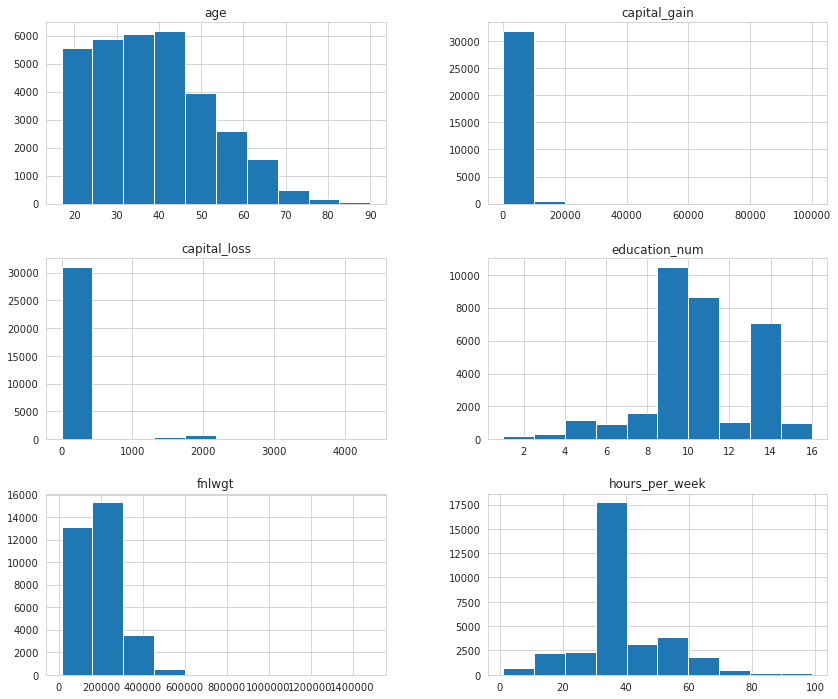

In [14]:
#Histogram charts
sns.set_style('whitegrid')
df_num = df_census.select_dtypes(include=['float64'])
df_census.hist(figsize =(14,12))



  The histograms show us all things we expect to see from the
  numerical categories.  Most of the workforce is from 20 to 50.  Educational
  lidsmitations look to have the largest difference between 8th - 9th grade.
  Implying that high school drop out rates are a factor in the dataset.   Hours
  per week also exhibited a large distribution around 40 hours a week, which
  fits common conception of American work hours.  fnl weight also showed some
  strange values in the upper ranges of the dataset, but seeing as its not
  going to be an area of focus for this analysis, we'll omit any changes here.

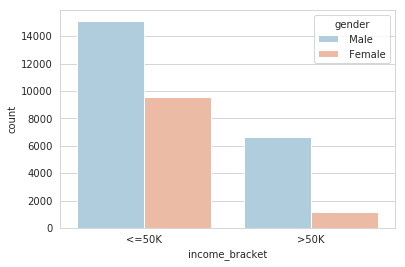

In [15]:
## boxplots of income by gender dist.
sns.set_style('whitegrid')
sns.countplot(x='income_bracket',
    hue='gender',
    data=df_census,
    palette='RdBu_r')


  This bar chart shows us the differences in male and female income based on
  gender.  We see counts are much higher in both income brackets for males.
  Suggesting that in 1994, the American workforce sampled had more men than
  women in the workforce.  In the >50k income bracket, males showed an even
  higher difference between their female counterparts, suggesting that males
  dominate that income bracket more so than those in the <=50 income bracket.


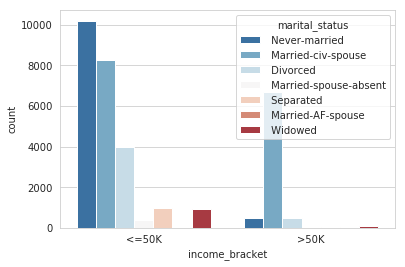

In [16]:
## by marital status
sns.set_style('whitegrid')
sns.countplot(x='income_bracket',
    hue='marital_status',
    data=df_census,
    palette='RdBu_r')



  This bar chart represents income bracket by marital status. Interesting to
  see a few things, first off the <=50k income bracket highest counts come from
  the "Never-married" status.  This suggests that marriage does in fact come
  with alot of financial benefit, as you can see is relevant on the other half
  of the chart.  As married couples far outmatch any other category counts in
  the >50k income bracket.  We can confirm this again as most of the divorced,
  separated, or widowed people are located in the lower income bracket.
  Suggesting that, if you want to make over 50k, you might want to get yourself
  a partner and keep them! For our next chart, Lets split up the age groups in
  bins of 10 years, and see what kind of income differences we see.


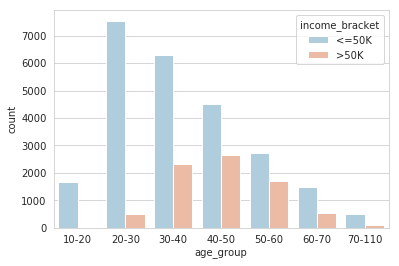

In [17]:
df_age = df_census.loc[:,['gender', 'age', 'income_bracket', 'hours_per_week']]
conditions = [
    (df_age['age'] < 20),
    (df_age['age'] < 30),
    (df_age['age'] < 40),
    (df_age['age'] < 50),
    (df_age['age'] < 60),
    (df_age['age'] < 70),
    (df_age['age'] < 110)]
choices = ['10-20', '20-30', '30-40','40-50','50-60','60-70','70-110']
df_age['age_group'] = np.select(conditions, choices, default='70-110')

sns.set_style('whitegrid')
sns.countplot(x='age_group',
    hue='income_bracket',
    data=df_age,
    palette='RdBu_r',
    order=choices)



  The first thing we're drawn too is that not many 10-20 year olds are making
  over 50k!  What a surprise.  Its interesting how the two income groups tend
  to converge once age groups get to the 40-50 range, but then both steadily
  decline afterwards.  This follows suit with the average retirement age in
  America of 62 years old.  But the largest jump in those in the >50k group
  looks to happen around age 30 to 40.  Suggesting that if you're not clearing
  that mark by 40, then chances are its going to get a harder to do so from
  then on. Next we'll, analyze means of hours worked per the
  education category.

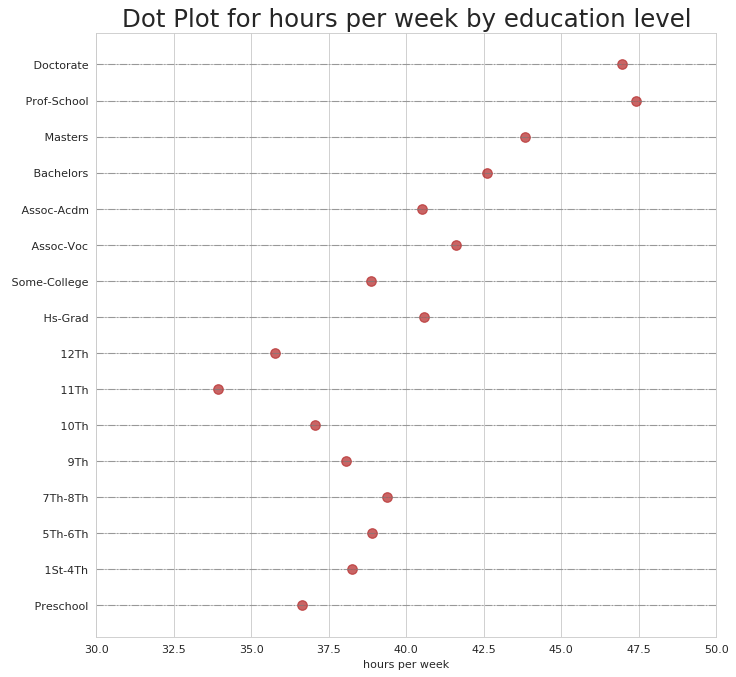

In [18]:

df = df_census[['hours_per_week', 'education','education_num']].groupby('education').apply(lambda x: x.mean())
df.sort_values('education_num', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10,10), dpi= 80)
ax.hlines(y=df.index, xmin=30, xmax=50, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.hours_per_week, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for hours per week by education level', fontdict={'size':22})
ax.set_xlabel('hours per week')
ax.set_yticks(df.index)
ax.set_yticklabels(df.education.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(30, 50)
plt.show()



 <a id="preparation"></a> <a href="#top">Back to Top</a>
 ## Section 3: Data Preparation:Part 1

 <a id="preparation1"></a> <a href="#top">Back to Top</a>
 ### Section 3.1 Part 1:

 Define and prepare your class variables. Use proper variable representations
 (int, float, one-hot, etc.). Use pre-processing methods (as needed) for
 dimensionality reduction, scaling, etc. Remove variables that are not
 needed/useful for the analysis.

 We've built a seperate py file that does all the pre-processing and will
 automatically clean and generate our dataframes for classification.  We will
 import it as lab_db from the dataBuilding py file.  It has all the necessary
 functions in order to build our data frames to be analyzed in the modeling
 section below.  Below is a list of the basic data cleaning and variable
 manipulation

 ### Data Specific cleaning
 1.  Reduced education levels to 3 levels of No Diploma, Associates, and Diploma
 2.  stripped any spaces off the leading or trailing characters
 3.  Segmented country of origin to continent
 4.  Encode the income_bracket target as binary


 ### Preprocessing
 For the continous variables, we will impute the median for any missing values
 and then use the StandardScaler to scale all the value's to a normalized
 range. Categorical attributes are transformed via sklearns "OneHotEncoder."
 This functions assigns a binary column to each category for every attribute.
 Currently we've set it to ignore any unknown variables ie - missing value's.

 Our data cleaning and encoding scripts are shown in the next cell:


In [ ]:
# %load analysis/dataBuilding.py

import pandas as pd
import numpy as np
import seaborn as sns
import timeit

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split

# Set Defaults
df_headers = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income_bracket'
]
cat_cols = [
    "workclass",
    "marital_status", 
    "occupation",
    "race", 
    "gender",
    "relationship",
    "education",
    "native_country"]

cont_cols = [
    "age", 
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week"]

cat_cols2 = [
    "workclass",
    "marital_status", 
    "occupation",
    "race",
    "relationship",
    "education",
    "native_country",
    "income_bracket"]

cont_cols2 = [
    "age", 
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week"]

drop_cols =[]
# drop_cols = [
#     'fnlwgt',
#     "native_country",
#     "education"]

target_col = "target"



def fetch_df():
    """Fetch raw unprocessed data from csv's
    
    Returns:
        dataframe -- returns concatenated dataframe of all data. 
        split how you like later
    """
    df_training = pd.read_csv("data/adult-training.csv",
        names=df_headers, 
        skipinitialspace = True)

    df_test = pd.read_csv("data/adult-test.csv",
        names = df_headers,
        skipinitialspace = True,
        skiprows=1)

    df = pd.concat([df_training,df_test],axis=0)
    # df.info()
    return df

def process_target(df,target_col=target_col):
    df[target_col] = (df["income_bracket"]
        .apply(lambda x: ">50K" in x)).astype(int)
    return df

def process_target2(df,target_col=target_col):
    df[target_col] = (df["gender"]
        .apply(lambda x: "Male" in x)).astype(int)
    return df

def process_drops(df, cols):
    return df.drop(cols,axis=1,inplace=True)


####################
## Data Specific
####################

def process_edu(df):
    replace_edu_no = ('1st-4th', '5th-6th','7th-8th','9th', '10th', '11th', '12th', 'Preschool')
    replace_edu_associate = ('Assoc-acdm', 'Assoc-voc')
    replace_edu_diploma = ('Some-college', 'HS-grad')

    df.education = df.education.replace(to_replace=replace_edu_no,value='No Diploma')
    df.education = df.education.replace(to_replace=replace_edu_associate,value='Associates')
    df.education = df.education.replace(to_replace=replace_edu_diploma,value='Diploma')
    return df['education'].str.strip()

def process_native(df):
    # Put countries in their native region continent
    replace_northA = ('United-States', 'Honduras', 'Mexico','Puerto-Rico','Canada', 'Outlying-US(Guam-USVI-etc)', 'Nicaragua', 'Guatemala', 'El-Salvador')
    replace_carib = ('Cuba', 'Jamaica', 'Trinadad&Tobago', 'Haiti', 'Dominican-Republic')
    replace_asia = ('South', 'Cambodia','Thailand','Laos', 'Taiwan', 'China', 'Japan', 'India', 'Iran', 'Philippines', 'Vietnam', 'Hong')
    replace_europe = ('England', 'Germany', 'Portugal', 'Italy', 'Poland', 'France', 'Yugoslavia','Scotland', 'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands')
    replace_sa = ('Columbia', 'Ecuador', 'Peru')
    replace_other = ('?')
    df.native_country = df.native_country.replace(to_replace=replace_northA,value='North America')
    df.native_country = df.native_country.replace(to_replace=replace_northA,value='North America')
    df.native_country = df.native_country.replace(to_replace=replace_carib,value='Caribbean')
    df.native_country = df.native_country.replace(to_replace=replace_asia,value='Asia')
    df.native_country = df.native_country.replace(to_replace=replace_europe,value='Europe') 
    df.native_country = df.native_country.replace(to_replace=replace_sa,value='South America')
    df.native_country = df.native_country.replace(to_replace=replace_other,value='Other')   
    return df

##### END DATA SPECIFIC #########

################################
## Scaling and Encoding Data 
################################

def build_preprocessor(cont_cols,cat_cols):
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_cols),
            ('cat', categorical_transformer, cat_cols)])
    return ('preprocessor',preprocessor)


def build_transform(cont_cols,cat_cols):
    return build_preprocessor(cont_cols,cat_cols)

##### END SACALING AND ENCODING #######

def split_df(X,y,split=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)
    return X_train, X_test, y_train, y_test

def build_df(drops=None):
    df = fetch_df()
    process_target(df, target_col=target_col)
    process_edu(df)
    process_native(df)
    process_drops(df,drops)
    X = df.drop(columns=["income_bracket",target_col])
    y = df[target_col]
    
    return X,y

def build_df2(drops=None):
    df = fetch_df()
    process_target2(df, target_col=target_col)
    process_edu(df)
    process_native(df)
    process_drops(df,drops)
    X = df.drop(columns=["gender",target_col])
    y = df[target_col]
    
    return X,y

In [20]:
# Data Import
#
from analysis import dataBuilding as lab_db

# Assign Default Vales for Columns
cat_cols,cont_cols,drop_cols = lab_db.cat_cols,lab_db.cont_cols,lab_db.drop_cols

# Drop Columns (if any)
X,y = lab_db.build_df(drop_cols)

# Transform continuous cols to scaled versions
# Transform categorical cols to Encoded Cols
trans = lab_db.build_transform(cont_cols,cat_cols)


In [21]:
# Execute Transforms specified above on all X data
X_processed = trans[1].fit_transform(X)
enc_headers = trans[1].named_transformers_['cat'].named_steps['onehot'].get_feature_names()
new_headers = np.concatenate((cont_cols,enc_headers))

In [22]:
# Split processed X data into training and test sets.
# Also separate y (label) data into training and test sets.
X_train, X_test, y_train, y_test = lab_db.split_df(X_processed,y,0.2)





 <a id="preparation2"></a> <a href="#top">Back to Top</a>
 ### Section 3.2 Part 2:

 Describe the final dataset that is used for classification/regression (include
 a description of any newly formed variables you created).


 Our final dataset shape

In [23]:
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))
#
# For the final shape of our dataset with the split, we have 39073 instances and
# 62 attributes.  The added attributes come from the one hot encoding that
# splits the categories in to their own binary response for faster code
# excecution.  
#


Number of observations in the training data: 39073
Number of observations in the test data: 9769



 <a id="modeling"></a> <a href="#top">Back to Top</a>
 ## Section 4: Modeling and Evaluation:


 <a id="modeling1"></a> <a href="#top">Back to Top</a>
 ### Section 4.1 Part 1:

 Choose and explain your evaluation metrics that you will use (i.e., accuracy,
 precision, recall, F-measure, or any metric we have discussed). Why are the
 measure(s) appropriate for analyzing the results of your modeling? Give a
 detailed explanation backing up any assertions.


 Lets take the time to explain some of the precision outputs.
 * precision - this is the ratio of the number of true positives and false
   positives.
 * recall - this is the ratio of the number of true positives and false
   negatives
 * f1-score - the harmonic mean of the precision and recall.
 * support - occurances in each class
 * accuracy - count of predictions where the predicted value equals the actual
   value
 * Log Loss - the negative log-likelihood of correct classification given the
   classifier prediction.


 We settled on accuracy and F-1 score as our two metrics for tracking
 performance. Accuracy is a desired metric for classification as you're always
 trying to improve your models ability to predict. F1-Score is a balanced
 mean between precision and recall. Our initial analysis shows we still have a
 fair amount of false positives showing an uneven balanced class, which is why
 we will focus on F1 as well for this analysis. We also will use a normalized
 confusion matrix in order to gain insight into how each of our models are
 performing. Lastly, We will do a statistical analysis comparing these metrics
 later in the report.



 <a id="modeling2"></a> <a href="#top">Back to Top</a>
 ### Section 4.2 Part 2:

 Choose the method you will use for dividing your data into training and
 testing splits (i.e., are you using Stratified 10-fold cross validation?
 Why?). Explain why your chosen method is appropriate or use more than one
 method as appropriate. For example, if you are using time series data then you
 should be using continuous training and testing sets across time.

 We chose in this analysis to use the train/test split method of cross validation. Due to
 our sufficiently large data set, we only need to do one fold. Because we are predicting on categorical data, a
 and every row is unique, we just used simple sklearn sampling of our dataset to generate the two splits.
 We can see the size of the splits in the cell above.


 <a id="modeling3"></a> <a href="#top">Back to Top</a>
 ### Section 4.3 Part 3:

 Create three different classification/regression models for each task (e.g.,
 random forest, KNN, and SVM for task one and the same or different algorithms
 for task two). Two modeling techniques must be new (but the third could be SVM
 or logistic regression). Adjust parameters as appropriate to increase
 generalization performance using your chosen metric. You must investigate
 different parameters of the algorithms!


 <a id="modeling3_1"></a> <a href="#top">Back to Top</a>
 ### Task 1:  Classification of making > or <= 50k

 Our first task is to determine a persons income bracket
 by way of 3 different classification models. Our first model will be to
 create a logistic regression model. We will follow that with other
 classification methods such as Random Forest, and K-nearest neighbor.


In [24]:
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




 <a id="modeling3_1_1"></a> <a href="#top">Back to Top</a>

 ### Logistic Regression


 Logistic regression (LR) is a classification algorithm thats used to predict
 the probability of our categorical dependent variable.  The basics behind LR
 is that it takes the output of a linear model and crams it into a logistic
 function to give it a probablity of 0 to 1 (but never equaling 0 or 1). We
 will implement this model as our first for Task 1.



In [25]:
# # Initialize performance array to store model performances for various 
# # models used in Lab 02.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

start = timeit.default_timer()
performance = []
logClassifier = LogisticRegression()


In [26]:
## Fit Logistic Classifier on training data
logClassifier.fit(X_train,y_train)
train_score = logClassifier.score(X_train,y_train)
test_score = logClassifier.score(X_test,y_test)

## Analyze how the model performed when tested against both 
## the data the model used for fit and test data. This helps 
## us identify overfitting.
print(f'LogisticRegression : Training score - {round(train_score,6)} - Test score - {round(test_score,6)}')



/nix/store/mgfg3a3wlfrb0jj8kk48gbcdncrf8xj7-python3.7-scikit-learn-0.21.2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression : Training score - 0.850997 - Test score - 0.85628


Normalized confusion matrix
[[0.93800027 0.06199973]
 [0.39491243 0.60508757]]
Logistic regression : accuracy score - 0.8562800696079435
Logistic regression : f1 score - 0.6739433348815607


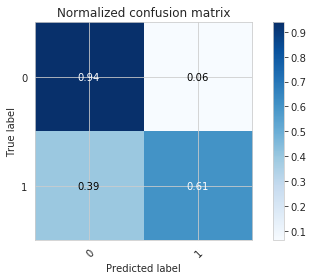

In [27]:
y_pred = logClassifier.predict(X_test)
plot_confusion_matrix(y_test,y_pred)
print(f'Logistic regression : accuracy score - {metrics.accuracy_score(y_test,y_pred)}')

print(f'Logistic regression : f1 score - {metrics.f1_score(y_test,y_pred)}')

stop = timeit.default_timer()
t = stop - start
performance.append({'algorithm':'LogisticRegressionT1',
    'accuracy':metrics.accuracy_score(y_test,y_pred),
    'f1 score':metrics.f1_score(y_test,y_pred),
    'observations' : len(y_test),
    'run time' : t})


 Our Logistic regression gives us an accuracy of 84.8%, however suffered from a lower F1 score of 0.639.
 This is likely due to the models high amount of false negatives, as we can see from the confusion matrix, the model gave us nearly
 as many false negatives as true positives. It was however very good at detecting true negatives.


 <a id="modeling3_1_2"></a> <a href="#top">Back to Top</a>
 ### Random Forest


 One of the most commonly used classifier techniques is random forest, due to
 its very low bias and general stability when it comes to classification.  One
 method of optimizing a random forest model is to try different parameters to
 increase performance. Another method of doing so is by utilizing grid search
 to let random forrest decide which combination of hyperparameters would be best
 implemented in your model.  We chose this route as it saves both time and
 sanity when comparing so many different parameters.

 We'll start with a baseline random forest for our starting position.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


clf =RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f'Random Forest : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')

print(f'Random Forest : F1 score - {metrics.f1_score(y_test, y_pred)}')

Random Forest : Accuracy score - 0.8458388780837343
Random Forest : F1 score - 0.6594301221166893


Normalized confusion matrix
[[0.92321259 0.07678741]
 [0.39199333 0.60800667]]


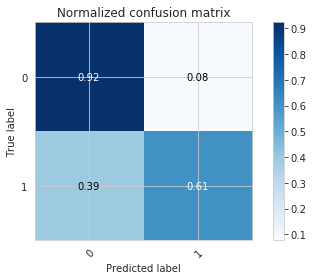

In [29]:
plot_confusion_matrix(y_test, y_pred)



 Our initial run shows a decent accuracy with a basis of n_estimators at 100.
 With an Accuracy of 84.7%. The F1 score offered a slight improvement over that
 of the simple logistic regression, which is visible in the slightly lowered
 amount of false negatives in the confusion matrix. One clear issue with this
 model however, which causes it to be poorly performing, is the relatively high
 rate of false positives. Thats a pretty good initial run, but improvements can
 be made.  Now we will implement a gridsearch over this random forrest to
 extract optimal hyperparameters for tuning our random forest.  Our chosen
 hyperparameter tuning features will be

 ** max_features **
   * Max Features looks to optimize the number of features to consider when
     looking for a split


 ** n_estimators **
   * n_estimators sets the number of tree's in a forest.  Adding more tree's
     will increase your accuracy, but also make the training process very time
     costly.


 ** min_samples_leaf **
   * This is the minimum number of samples required for a leaf node to be
     created.


In [31]:
clf =RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f'Random Forest : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')
print(f'Random Forest : f1 score - {metrics.f1_score(y_test, y_pred)}')
# performance.append({'algorithm':'Random Forrest', 'testing_score':metrics.accuracy_score(y_test, y_pred)})
#  Commented out performance append because we just want to capture the last run.

## This gives you the name of the features that are important according to the RFC
feature_imp = pd.Series(clf.feature_importances_,index=new_headers).sort_values(ascending=False)
top_feat = feature_imp.nlargest(n=8)
feature_imp


Random Forest : Accuracy score - 0.8463507011976661
Random Forest : f1 score - 0.6296570441648163


x1_Married-civ-spouse       0.160016
x5_Husband                  0.125052
education_num               0.114736
capital_gain                0.102814
x1_Never-married            0.066127
age                         0.041115
hours_per_week              0.037141
x2_Exec-managerial          0.033823
x6_No Diploma               0.030833
x5_Own-child                0.027142
x2_Prof-specialty           0.023992
x5_Not-in-family            0.023864
x6_Bachelors                0.023504
capital_loss                0.022732
x4_Female                   0.021707
x5_Wife                     0.020734
x6_Diploma                  0.019693
x4_Male                     0.016925
x6_Masters                  0.011137
x1_Divorced                 0.009191
x5_Unmarried                0.008495
x2_Other-service            0.007929
x6_Prof-school              0.006656
x0_Self-emp-inc             0.004816
x2_Farming-fishing          0.004234
x0_Self-emp-not-inc         0.003762
x6_Associates               0.002962
x

No handles with labels found to put in legend.


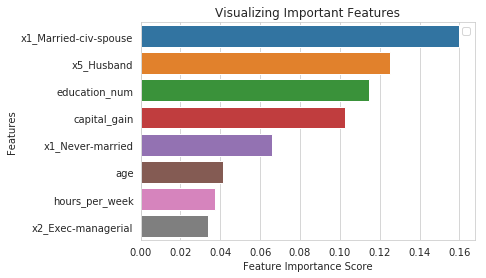

In [32]:
# Creating a bar plot
sns.barplot(x=top_feat, y=top_feat.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



 With these parameters, we have built improved our rate of false
 positives slightly, but drastically worsened our rate of false negatives:


Normalized confusion matrix
[[0.94858228 0.05141772]
 [0.46788991 0.53211009]]


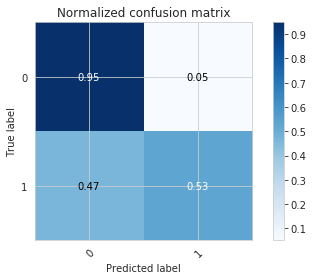

In [33]:

plot_confusion_matrix(y_test, y_pred)



 Let us continue adjusting the model.
 First, let us adjust the number of features, and allow for basically any number of features to be included in the final model.
 This should help with the false negative problem we have been having.


Normalized confusion matrix
[[0.94668295 0.05331705]
 [0.3999166  0.6000834 ]]
Random Forest : Accuracy score - 0.8616030299928344
Random Forest : f1 score - 0.6803782505910165


x1_Married-civ-spouse       3.348747e-01
capital_gain                1.944019e-01
education_num               1.909800e-01
age                         5.700608e-02
x5_Husband                  5.371147e-02
capital_loss                4.556580e-02
hours_per_week              4.251332e-02
x6_No Diploma               1.619702e-02
x2_Exec-managerial          1.328019e-02
x5_Wife                     1.081996e-02
x0_Self-emp-not-inc         6.605463e-03
x2_Prof-specialty           6.351570e-03
x0_Private                  3.000496e-03
x2_Other-service            2.857259e-03
x2_Sales                    2.179060e-03
x2_Farming-fishing          2.096346e-03
x6_Bachelors                1.872373e-03
x2_Tech-support             1.500995e-03
x4_Male                     1.498130e-03
x2_Craft-repair             1.497942e-03
x4_Female                   1.487476e-03
x0_Federal-gov              1.079941e-03
x2_Adm-clerical             1.057248e-03
x3_White                    1.029274e-03
x6_Masters      

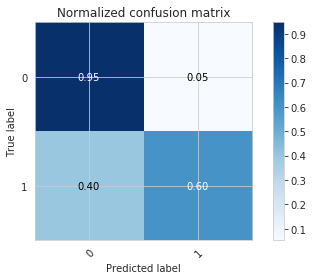

In [34]:


clf =RandomForestClassifier(n_estimators=50,max_features=50,min_samples_leaf=50, n_jobs = -1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
print(f'Random Forest : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')
print(f'Random Forest : f1 score - {metrics.f1_score(y_test, y_pred)}')

## This gives you the name of the features that are important according to the RFC
feature_imp = pd.Series(clf.feature_importances_,index=new_headers).sort_values(ascending=False)
top_feat = feature_imp.nlargest(n=8)
feature_imp


 This is our best model so far. We have maintained the low rate of false
 positives, while also lowering the rate of false negatives to near its default
 level. Let us check out this models most important features:


No handles with labels found to put in legend.


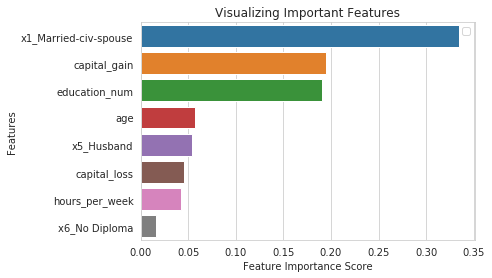

In [35]:
# Creating a bar plot
sns.barplot(x=top_feat, y=top_feat.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



 Let us now tune the model even further, raising the number of
 estimators, as well as lowering the the minumum samples per leaf:


Normalized confusion matrix
[[0.94763261 0.05236739]
 [0.38573812 0.61426188]]
Random Forest : Accuracy score - 0.8657999795270754
Random Forest : F1 score - 0.6920366455250176


x1_Married-civ-spouse       2.830152e-01
capital_gain                1.715353e-01
education_num               1.692027e-01
age                         9.563829e-02
hours_per_week              5.715575e-02
capital_loss                4.998439e-02
x5_Husband                  4.910812e-02
x2_Exec-managerial          1.371221e-02
x6_No Diploma               1.124341e-02
x5_Wife                     1.063211e-02
x0_Self-emp-not-inc         8.395626e-03
x0_Private                  7.681241e-03
x2_Prof-specialty           6.821128e-03
x2_Sales                    4.812217e-03
x2_Other-service            4.619434e-03
x2_Craft-repair             4.559183e-03
x2_Farming-fishing          3.382720e-03
x2_Adm-clerical             2.947129e-03
x6_Bachelors                2.812402e-03
x2_Transport-moving         2.735297e-03
x4_Female                   2.614347e-03
x4_Male                     2.461197e-03
x3_White                    2.451869e-03
x2_Handlers-cleaners        2.415055e-03
x2_Tech-support 

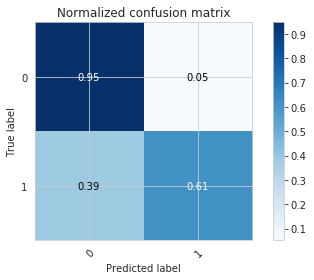

In [36]:
start = timeit.default_timer()

clf =RandomForestClassifier(n_estimators=500,max_features=50,min_samples_leaf=10, n_jobs = -1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

stop = timeit.default_timer()
t = stop - start

plot_confusion_matrix(y_test, y_pred)
print(f'Random Forest : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')
print(f'Random Forest : F1 score - {metrics.f1_score(y_test, y_pred)}')
performance.append({'algorithm':'Random ForestT1', 
    'accuracy':metrics.accuracy_score(y_test, y_pred),
    'f1 score':metrics.f1_score(y_test,y_pred),
    'observations' : len(y_test),
    'run time' : t})



## This gives you the name of the features that are important according to the RFC
feature_imp = pd.Series(clf.feature_importances_,index=new_headers).sort_values(ascending=False)
top_feat = feature_imp.nlargest(n=8)
feature_imp


In [37]:
# A significant improvement! We have managed to slightly improve the false negative rate of the original random forest,
# while keepig our noticibeale false positive rate improvements. And look at that high F1 score! Lets check out what features this new
# super-accurate model suggests:

No handles with labels found to put in legend.


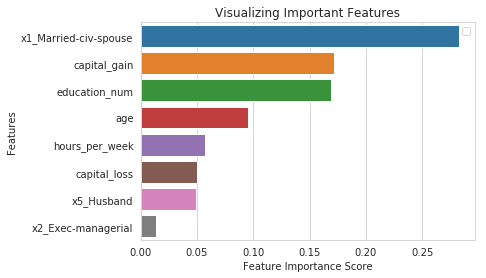

In [38]:

sns.barplot(x=top_feat, y=top_feat.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


 Interestingly, this and a lot of the much cheaper models have very similar top
 features. Therefore, if the goal of our analysis was to simply determine the
 important features to make a simple model, we would want to choose one of the
 cheaper models with similar results. However, if we are going for accuracy,
 and low false positive and false negtive rates, this more expensive model is
 demonstrably superior




 <a id="modeling3_1_3"></a> <a href="#top">Back to Top</a>
 ### KNN: K-nearest neighbors

 Next we have our KNN model using varying n_neighbor values. We will attempt to
 identify the optimal number of neighbors that allows for highest degree of
 accurancy while also being useful when tested on both the training and test
 set of data.


In [39]:
start = timeit.default_timer()

knn_scores = []
train_scores = []
test_scores = []
for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score,'testing_score':test_score})




KNN : Training score - 0.9689299516290021 -- Test score - 0.8030504657590337
KNN : Training score - 0.8990607324751106 -- Test score - 0.8259801412631794
KNN : Training score - 0.8805057200624472 -- Test score - 0.8335551233493704
KNN : Training score - 0.8748240472960868 -- Test score - 0.8375473436380387
KNN : Training score - 0.8706011824021703 -- Test score - 0.8416419285494933
KNN : Training score - 0.8680418703452512 -- Test score - 0.8447128672330843
KNN : Training score - 0.866147979423131 -- Test score - 0.8457365134609479
KNN : Training score - 0.8647147646712564 -- Test score - 0.8457365134609479
KNN : Training score - 0.8632815499193817 -- Test score - 0.8463507011976661
KNN : Training score - 0.8623090113377524 -- Test score - 0.8453270549698024



 Visualizing the test vs training model scores helps us identify the the
 optimal n_neighbors level to train the model. We want to minimize the
 difference in performance between two sets while as well as optimize number of
 neighbors needed.  From the look of the scatterplot below, 5 nearest neighbors
 appears to be our best value for an even bias/variance tradeoff.



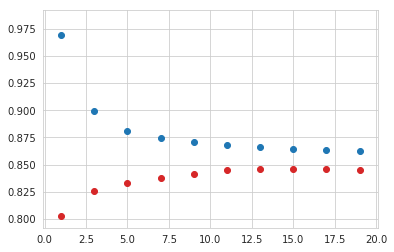

In [40]:
fig, ax = plt.subplots()
colors = ['tab:blue','tab:red']
for i,data in enumerate([train_scores,test_scores]):

    ax.scatter(x=range(1, 20, 2),y=data, c=colors[i])
# plt.scatter(x=range(1, 20, 2),y=train_scores,c='b',)
# plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')
plt.style.use('seaborn-pastel')
plt.show()



 Let us take a look at the accuracy and F1 scores for our best KNN model, as
 well as a confusion matrix:

Normalized confusion matrix
[[0.91290191 0.08709809]
 [0.41034195 0.58965805]]
KNN : Accuracy score - 0.8335551233493704
KNN : f1 score - 0.6349348899865289


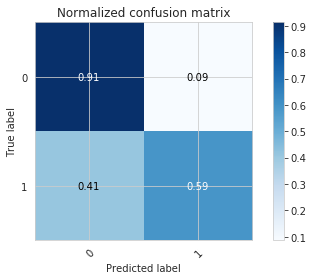

In [41]:

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

stop = timeit.default_timer()
t = stop - start

plot_confusion_matrix(y_test, y_pred)
print(f'KNN : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')
print(f'KNN : f1 score - {metrics.f1_score(y_test, y_pred)}')
performance.append({'algorithm':'KNNT1', 
    'accuracy':metrics.accuracy_score(y_test, y_pred),
    'f1 score':metrics.f1_score(y_test,y_pred),
    'observations' : len(y_test),
    'run time' : t})




 Looking at the result of our knn test, it is not as well performing as the
 random forest. It is slower, has lower accuracy, and has an overall low  f1
 score. This is likely due to the relatively high rate of false positives.





 <a id="modeling3_2"></a> <a href="#top">Back to Top</a>
 ### Task 2:  Classification of gender


 For Task 2, we decided to predict the gender of a person in the Census data.
 This was chosen due to the binary outcome of that column and it seemed like
 fun to predict.  On this task, we will classify the gender of the person using
 Logistic Regression, Random Forest, Naive Bayes, and Stochastic Gradient
 Descent



In [42]:
#
# Data Import for task 2
#
from analysis import dataBuilding as lab_db

# Assign Default Values for Columns
cat_cols2,cont_cols2,drop_cols = lab_db.cat_cols2,lab_db.cont_cols2,lab_db.drop_cols

# Drop Columns (if any)
X,y = lab_db.build_df2(drop_cols)

# Transform continuous cols to scaled versions
# Transform categorical cols to Encoded Cols
trans = lab_db.build_transform(cont_cols2,cat_cols2)


In [43]:
# Execute Transforms specified above on all X data
X_processed = trans[1].fit_transform(X)
enc_headers = trans[1].named_transformers_['cat'].named_steps['onehot'].get_feature_names()
new_headers = np.concatenate((cont_cols,enc_headers))

In [44]:
# Split processed X data into training and test sets.
# Also separate y (label) data into training and test sets.
X_train, X_test, y_train, y_test = lab_db.split_df(X_processed,y,0.2)



In [45]:
# # Initialize performance array to store model performances for various 
# # 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

start = timeit.default_timer()

logClassifier = LogisticRegression()



 <a id="modeling3_2_1"></a> <a href="#top">Back to Top</a>
 ### Logistic Regression

 First, we will be looking at a simple logistic regression model in order to
 predict whether a person, given demographic circumstances, is a man or a
 woman. We are starting with logistic regression because it is fast, simple,
 and if it performs equally well as other models it is likely the best model to
 choose, due to its cheapness and simplicity. Therefore it will act as a
 standard to compare to the other models

In [46]:
## Fit Logistic Classifier on training data
logClassifier.fit(X_train,y_train)
train_score = logClassifier.score(X_train,y_train)
test_score = logClassifier.score(X_test,y_test)

## Analyze how the model performed when tested against both 
## the data the model used for fit and test data. This helps 
## us identify overfitting.
print(f'LogisticRegression : Training score - {round(train_score,6)} - Test score - {round(test_score,6)}')


/nix/store/mgfg3a3wlfrb0jj8kk48gbcdncrf8xj7-python3.7-scikit-learn-0.21.2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression : Training score - 0.844445 - Test score - 0.841437


 let us now look at a confusion matrix, accuracy, and F1 score fore this model:

Normalized confusion matrix
[[0.79436965 0.20563035]
 [0.13490232 0.86509768]]
Logistic Regression : Accuracy score - 0.8414371993039206
Logistic Regression : f1 score - 0.8789560053137454


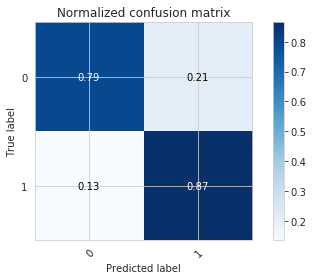

In [47]:
y_pred = logClassifier.predict(X_test)

stop = timeit.default_timer()
t = stop - start

plot_confusion_matrix(y_test, y_pred)
print(f'Logistic Regression : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')
print(f'Logistic Regression : f1 score - {metrics.f1_score(y_test, y_pred)}')

performance.append({'algorithm':'LogisticRegressionT2',
    'accuracy':metrics.accuracy_score(y_test,y_pred),
    'f1 score':metrics.f1_score(y_test,y_pred),
    'observations' : len(y_test),
    'run time' : t})



 This model is very interesting. Although it has a high rate of false
 positives, it has an exceedingly low rate of false negatives. Thus, it has a
 higher F1 score than it does accuracy. This model would be really useful in
 situations where where a false negative would be really bad but a false
 positive is fine


 Let us now move on to the random forest. We will first run a grid search in
 parallel in order to find the proper parameters for this one. The random
 forest, while a more expensive model than logistic regression, has a chance to
 not only give us a better preditcion/classification than logisrtic regression,
 but also has a wonderful built in tool for viewing which estimators are the
 most important. This tool can be useful in deciding on further models, as well
 as just looking for which variables are most important and deserve a closer
 look or more data collection for future use.




 ### Random Forest


In [48]:
#
#
#Che Forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

start = timeit.default_timer()

svcEstimator = RandomForestClassifier()
cv = 3

#compare various values of C, kernels (rbf vs linear vs poly),decision_function_shape (ovo vs ovr)
parameters = {'n_estimators': [100,250,500]
            , 'max_depth': [5,25,50,100]}

#Create a grid search object using the
from sklearn.model_selection import GridSearchCV
svcGridSearch = GridSearchCV(estimator=svcEstimator
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 3
                   , scoring='accuracy')

svcGridSearch.fit(X_train, y_train)
print("The best estimator based on F1 is ", svcGridSearch.best_estimator_)
best_rf = svcGridSearch.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   46.6s finished


The best estimator based on F1 is  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


No handles with labels found to put in legend.


Accuracy: 0.8437915856280069


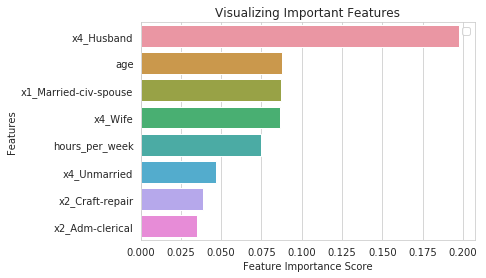

In [49]:
#Create from best estimator search of random forest
clf=best_rf

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

stop = timeit.default_timer()
t = stop - start

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## This gives you the name of the features that are important according to the RFC
feature_imp = pd.Series(clf.feature_importances_,index=new_headers).sort_values(ascending=False)
top_feat = feature_imp.nlargest(n=8)

# Creating a bar plot
sns.barplot(x=top_feat, y=top_feat.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


Normalized confusion matrix
[[0.78029376 0.21970624]
 [0.12428857 0.87571143]]
Random Forest : Accuracy score - 0.8437915856280069
Random Forest : F1 score - 0.8818153655514251


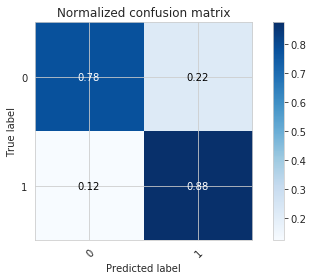

In [50]:

plot_confusion_matrix(y_test, y_pred)
print(f'Random Forest : Accuracy score - {metrics.accuracy_score(y_test, y_pred)}')
print(f'Random Forest : F1 score - {metrics.f1_score(y_test, y_pred)}')

performance.append({'algorithm':'Random ForestT2', 
    'accuracy':metrics.accuracy_score(y_test, y_pred),
    'f1 score':metrics.f1_score(y_test,y_pred),
    'observations' : len(y_test),
    'run time' : t})



 To create this model, we first ran a grid search in parallel to tune the
 hyperparameters to optimal values. We then took the best model and delved
 deeper into it. This model boasts a very high accuracy, high F1 score, and a
 very low false negative (as well as very low false positive) rate. While
 improving accuracy, this model is highly computationally expensive. Therefore,
 this model would be used only in situations when accuracy is crucial. In
 situations in which we just want to find the best predictors, or just quickly
 get a decent model, any of the above models would suffice, however this model
 is extremely accurate, at the cost of relatively extreme computation time. The
 grid search is a powerful tool which can be used to tune models to perfection
 at a high computational cost


 <a id="modeling3_2_3"></a> <a href="#top">Back to Top</a>
 ### Naive Bayes
 The next model we will test is the naive bayes classifier.
 In our case, it is highly likely that the naive bayes classifier is a well performing model
 as a lot of our features can be assumed to be, in a perfect world, independent. However, some features may not be totally independent, as indicated
 in our previous analysis, there may be a relationship between some of the features and income. This may lead to some issues with the model.
 We will learn whether or not this is an issue or not in the next cell:


Normalized confusion matrix
[[0.93298654 0.06701346]
 [0.23211814 0.76788186]]
Naive Bayes : Accuracy: 0.8231139318251612
Naive Bayes : F1 score 0.8524590163934428


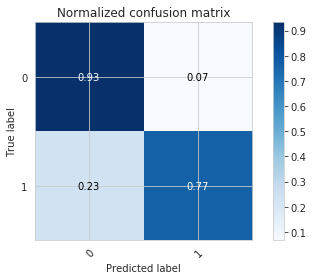

In [51]:
from sklearn.naive_bayes import GaussianNB

start = timeit.default_timer()

model = GaussianNB()
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

stop = timeit.default_timer()
t = stop - start

plot_confusion_matrix(y_test,pred_y,normalize=True)
print("Naive Bayes : Accuracy:",metrics.accuracy_score(y_test, pred_y))

print("Naive Bayes : F1 score",metrics.f1_score(y_test, pred_y))

performance.append({'algorithm':'Naive BayesT2', 
    'accuracy':metrics.accuracy_score(y_test, pred_y),
    'f1 score':metrics.f1_score(y_test,pred_y),
    'observations' : len(y_test),
    'run time' : t})


 This model performed significantly better than the previous random forest in the fact of correctly identifying negatives, there were
 far fewer false positives. However, it performed much worse in the regard of identifying positives, with a much higher false negative rate. This
 again is likely due to some of the dependence between features.


 Next we will try out a stochastic gradient descent model:

 <a id="modeling3_2_4"></a> <a href="#top">Back to Top</a>

 ### Stochastic Gradient Descent

 Stochastic Gradient Desent is a relative of gradient desent algorithm.  Where
 GD follows a step by step process through each observation, SGD shuffles
 its observations randomly.  Introducing less bias into the model.  It is not visible here, for the sake of the grader
 who already has so much to read and look over, but we investigated the loss, max iter, and penalty parameters
 It was found that by using the elasticnet penalty, which provides a nice balance between the l1 and l2 penalties
 produced the best results. We tried several loss parameters, but it was found that the "hinge" loss,
 which causes the SGD to act similarly to a SVM, performs best. We also tried modified hinge, which is more accepting of outliers,
 perceptron, squared hinge, and log loss (which acts like logarithmic regression), but it was found that hinge loss
 gave us the best model performance:

Accuracy: 0.8367284266557478
F1: 0.8706302214291508
Normalized confusion matrix
[[0.85893513 0.14106487]
 [0.1744347  0.8255653 ]]


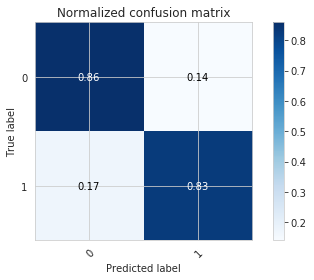

In [52]:
from sklearn.linear_model import SGDClassifier

start = timeit.default_timer()

clf = SGDClassifier(loss = "hinge", penalty="elasticnet", max_iter=5000, n_jobs = -1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

stop = timeit.default_timer()
t = stop - start

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

plot_confusion_matrix(y_test,y_pred,normalize=True)

performance.append({'algorithm':'SGD T2', 
    'accuracy':metrics.accuracy_score(y_test, y_pred),
    'f1 score':metrics.f1_score(y_test,y_pred),
    'observations' : len(y_test),
    'run time' : t})




 This model performed moderately well, it had a good false negative rate, but a less than  stellar false positive rate. This model performed
 relatively quickly and gave decent results, however it is not quite in contention to be our final model.


 <a id="modeling4"></a> <a href="#top">Back to Top</a>
 ### Section 4.4 Part 4:

 Analyze the results using your chosen method of evaluation. Use visualizations
 of the results to bolster the analysis. Explain any visuals and analyze why
 they are interesting to someone that might use this model.

 Below are the results from our various model runs over both tasks.  Judging
 from the intial results, it seems our Random forrests were the best performers
 on the accuracy side.  Yet the F1-score for Random ForestT1 was a bit lower.
 Because we widened our parameter search on the second random forest to a greater
 numer of estimators and a smaller minimum leaf node, it was able to yield a
 better accuracy due to increased tree creation.




In [53]:
# Confidence interval
tperf = pd.DataFrame(performance)
tperf.round({'accuracy':5, 'f1 score':5})
tperf

# TODO - Insert accuracy chart here


,accuracy,algorithm,f1 score,observations,run time
0,0.856280,LogisticRegressionT1,0.673943,9769,5.569277
1,0.865800,Random ForestT1,0.692037,9769,11.404309
2,0.833555,KNNT1,0.634935,9769,452.031705
3,0.841437,LogisticRegressionT2,0.878956,9769,3.919956
4,0.843792,Random ForestT2,0.881815,9769,118.509486
5,0.823114,Naive BayesT2,0.852459,9769,0.032109
6,0.836728,SGD T2,0.870630,9769,0.370234



 <a id="modeling5"></a> <a href="#top">Back to Top</a>
 ### Section 4.5 Part 5:

 Discuss the advantages of each model for each classification task, if any. If
 there are not advantages, explain why. Is any model better than another? Is
 the difference significant with 95% confidence? Use proper statistical
 comparison methods. You must use statistical comparison techniques—be sure
 they are appropriate for your chosen method of validation as discussed in unit
 7 of the course.

 To compare our models, we'll first analyze the variance of each binomial
 proportion confidence interval.  Then, assuming a Gaussian Distribution, we
 can apply confidence intervals to the classification accuracy.  This will give
 us our confidence intervals for accuracy.


In [54]:
from math import sqrt
tnew = tperf
z = 1.96
# tnew['confint'] = ""
# tnew['upperinterval'] = float(0)
# tnew['lowerinterval'] = float(0)

for index_label, row_series in tnew.iterrows():
   tnew.at[index_label , 'confint'] = z * sqrt((row_series['accuracy'] * (1-row_series['accuracy']))/ row_series['observations'])

for index_label, row_series in tnew.iterrows():
   tnew.at[index_label , 'upperinterval'] = row_series['accuracy'] + row_series['confint']
   tnew.at[index_label , 'lowerinterval'] = row_series['accuracy'] - row_series['confint']

tnew


,accuracy,algorithm,f1 score,observations,run time,confint,upperinterval,lowerinterval
0,0.856280,LogisticRegressionT1,0.673943,9769,5.569277,0.006957,0.863237,0.849323
1,0.865800,Random ForestT1,0.692037,9769,11.404309,0.006760,0.872560,0.859040
2,0.833555,KNNT1,0.634935,9769,452.031705,0.007386,0.840942,0.826169
3,0.841437,LogisticRegressionT2,0.878956,9769,3.919956,0.007243,0.848681,0.834194
4,0.843792,Random ForestT2,0.881815,9769,118.509486,0.007199,0.850991,0.836592
5,0.823114,Naive BayesT2,0.852459,9769,0.032109,0.007567,0.830681,0.815547
6,0.836728,SGD T2,0.870630,9769,0.370234,0.007330,0.844058,0.829399


In [55]:
tnew.dtypes

accuracy         float64
algorithm         object
f1 score         float64
observations       int64
run time         float64
confint          float64
upperinterval    float64
lowerinterval    float64
dtype: object


 All of our models came out with an accuracy of 82-87%.  The highest accuracy
 for Task 1 goes to random forestT1 with an accuracy of 87.2% (86.6%, 87.9%)
 Due to our extra hyperparameter tuning and grid search, this allowed for the
 greatest accuracy. Due to the fact none of its competing models lie with in
 the Random ForestT1's interval, we can reject the null hypothesis that they
 are the same and have 95% confidence that they are statistically different
 from the other models.

 For Task 2, our best model was Logistic RegressionT2 with a classification
 accuracy of 84.6% (83.9%, 85.3%).  Because the confidence intervals for our
 log regT2 model do overlap with the random forestT2 results, we can't say
 there is a difference between the two.  Which gives us the discretion to
 choose whichever model we feel is best.  As logistic regression took about 1
 second to run and the random forest was nearly 200x that, we would select the
 Log RegT2 function due to time and cost savings for anyone who wanted to
 deploy that model.


 <a id="modeling6"></a> <a href="#top">Back to Top</a>
 ### Section 4.6 Part 6:

 Which attributes from your analysis are most important? Use proper methods
 discussed in class to evaluate the importance of different attributes. Discuss
 the results and hypothesize about why certain attributes are more important
 than others for a given classification task.

 #### Task 1:  Classification of making > or <= 50k

 For the first task of predicting a persons income bracket, our analysis found
 that these were the top attributes contributing to the model.  Earlier in our
 analysis, We noticed the discrepency of married couple's having a better
 financial advantage over unmarried, so we're glad to see that attribute on top
 as it validates that hypothesis.  Capital gain is no surprise as those people
 who are generating alot of capital tend to make more money, as well as those
 with higher education levels.  Finally age and hours per week were slightly
 lower than that but still important variables to target.



 | Attribute             | Feature Importance |
 |-----------------------|--------------------|
 | x1_Married-civ-spouse | 0.283315           |
 | capital_gain          | 0.169864           |
 | education_num         | 0.168771           |
 | age                   | 0.097187           |
 | hours_per_week        | 0.054886           |
 | capital_loss          | 0.052305           |
 | x5_Husband            | 0.048574           |
 | x2_Exec-managerial    | 0.014513           |
 | x6_No Diploma         | 0.012112           |
 | x5_Wife               | 0.011441           |
 | x0_Private            | 0.007960           |
 #### Task 2: Classification of gender

 For the second task of predicting gender, we see some slightly more obvious
 results. The Husband and wife category are the biggest predictors as they
 themselves are an indicator of gender, but in today's modern gender
 definitions, this might not be as clear cut as 50 years ago.  Married, age,
 and hours_per_week would be next.  As these are also indicators of a single
 income family home where one parent may work and the other may not.  I'm not
 surprised to see adm-clerical as an important factor either as traditionally
 most administrative work falls under the female category. Craft-repair also
 falls into a sterotype of a female driven category so it too isn't suprising
 to see as a top influence.

 | Attribute             | Feature Importance |
 |-----------------------|--------------------|
 | x4_Husband            | 0.204476           |
 | X1_Married-civ-spouse | 0.087534           |
 | age                   | 0.086080           |
 | x4_Wife               | 0.086058           |
 | hours_per_week        | 0.072582           |
 | x4_Unmarried          | 0.048385           |
 | x2_Craft-repair       | 0.039049           |
 | x2_Adm-clerical       | 0.036414           |



 <a id="deployment"></a> <a href="#top">Back to Top</a>
 ### Section 4.7 Deployment:

 How useful is your model for interested parties (i.e., the companies or
 organizations that might want to use it for prediction)? How would you measure
 the model's value if it was used by these parties? How would your deploy your
 model for interested parties? What other data should be collected? How often
 would the model need to be updated, etc.?


 For our first task, targeting income, we forsee a multitude of possibilities
 for application. Whether it be for banks / credit card companies to improve
 their own models for how safe they feel lending a certain group of people
 money based on their financial circumstances.  It could also be applied for
 national survey's that people want to conduct.  Our model could help whittle
 down what factors they want to include in their updated model.  ie - which are
 the most significant variables and target those for analysis.  Another
 application could be for local governments, to help plan new schools, roads,
 child care and other facilities that benefit the population they reside in.


 For our second task, targeting gender, One area where this model may prove
 useful is in collecting user information from websites.  Given many websites
 have categorical descriptions of their user data, it someone was say, in the
 healthcare sector and was attempting to survey the general public on
 cardiovascular disease.   Some people may not feel inclined to report their
 gender, but that information could prove useful to the researcher in order to
 classify the person properly.  Using our classification technique's, we could
 retrofit the model over their survey data and begin to do prediction on that.


 Measuring the models value would be done through a consistent monitoring of
 the algorithms Accuracy and F1-score as we've done in this project.  Giving
 the end user the ability to keep tabs on how well the model is predicting, as
 we add more data to it.  Deployment of the model, could be through a rest API
 service, an internal function built in the backend of whatever database system
 they have in place.  In terms of other data that could be useful to Census
 Data, we would suggest finding a resource that can provide, housing ownership,
 local economic key performance factors, zip codes to determine talent pools
 for who lives in what area.  The possibilities are large depending on what
 factors influence the customers business most.  As each business you would
 sell this model too would likely have their own idea's behind what factors
 make them sucssesful.






 <a id="exceptional"></a> <a href="#top">Back to Top</a>
 ### Section 4.8 Exceptional Work:

 You have free reign to provide additional analyses. One idea: grid search
 parameters in a parallelized fashion and visualize the performances across
 attributes. Which parameters are most significant for making a good model for
 each classification algorithm?


 We implemented a grid search in both of our random forests.   Grid search
 itself is a parameter optimizing function that comes along with sklearn. It
 searches and implements a fit and score method.  Where each search is done by
 an array of parameters that you feed into it.  In ours, we varied the number
 of n_estimators and the max depth of the tree for Random ForestT2 model.  We
 increased our n_estimators to allow for more tree's in our forest.  We also
 set the max_depth to allow for greater depth in each tree and found the
 results to be more accurate without a drop off in F1-score as we saw in the
 Random ForestT1 model.  We also used a cross validation of 3 folds due to time
 savings when running the search. Its also a recommended value for larger
 datasets, which we have.


In [56]:
 svcEstimator = RandomForestClassifier()
 cv = 3
 #compare various values of C, kernels (rbf vs linear vs poly),decision_function_shape (ovo vs ovr)
 parameters = {'n_estimators': [100,250,500]
             , 'max_depth': [5,25,50,100]}
 #Create a grid search object using the
 from sklearn.model_selection import GridSearchCV
 svcGridSearch = GridSearchCV(estimator=svcEstimator
                    , n_jobs=-1 # jobs to run in parallel
                    , verbose=1 # low verbosity
                    , param_grid=parameters
                    , cv=cv # KFolds = 3
                    , scoring='accuracy')
 svcGridSearch.fit(X_train, y_train)
 print("The best estimator based on F1 is ", svcGridSearch.best_estimator_)
 best_rf = svcGridSearch.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   43.1s finished


The best estimator based on F1 is  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
